# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Ashim Izzuddin
- Email: muhammdashimizzuddin@gmail.com
- Id Dicoding: ashim_izzuddin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os

# Mengatur agar plot ditampilkan di notebook
%matplotlib inline

# Mengatur gaya plot agar lebih menarik
sns.set_style('whitegrid')

### Menyiapkan data yang akan digunakan

In [2]:
# Memuat dataset
# Kita menggunakan sep=';' karena pemisah dalam file CSV adalah titik koma
try:
    df = pd.read_csv('data.csv', sep=';')
    print("Dataset berhasil dimuat!")
    print(f"Ukuran dataset: {df.shape}")
except FileNotFoundError:
    print("Error: Pastikan file 'data.csv' berada di direktori yang sama dengan notebook Anda.")

Dataset berhasil dimuat!
Ukuran dataset: (4424, 37)


## Data Understanding

In [3]:
# Menampilkan 5 baris pertama dari data untuk mendapatkan gambaran awal
print("5 baris pertama data:")
display(df.head())

5 baris pertama data:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Menampilkan informasi ringkas tentang DataFrame
# Ini termasuk jumlah entri, jumlah kolom, nama kolom, jumlah nilai non-null, dan tipe data setiap kolom
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                       

In [5]:
# Menampilkan statistik deskriptif untuk kolom numerik
# Ini termasuk hitungan, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum
print("Statistik Deskriptif untuk Kolom Numerik:")
display(df.describe())

Statistik Deskriptif untuk Kolom Numerik:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Menghitung jumlah nilai yang hilang (missing values) di setiap kolom
print("Jumlah Nilai yang Hilang di Setiap Kolom:")
print(df.isnull().sum())

print("\n" + "="*50 + "\n")

# Memeriksa jumlah baris data yang terduplikasi
print(f"Jumlah Baris Duplikat: {df.duplicated().sum()}")

Jumlah Nilai yang Hilang di Setiap Kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_e

C:\Users\Pongo\AppData\Local\Temp\ipykernel_23436\2439974444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Status', data=df, palette='viridis')


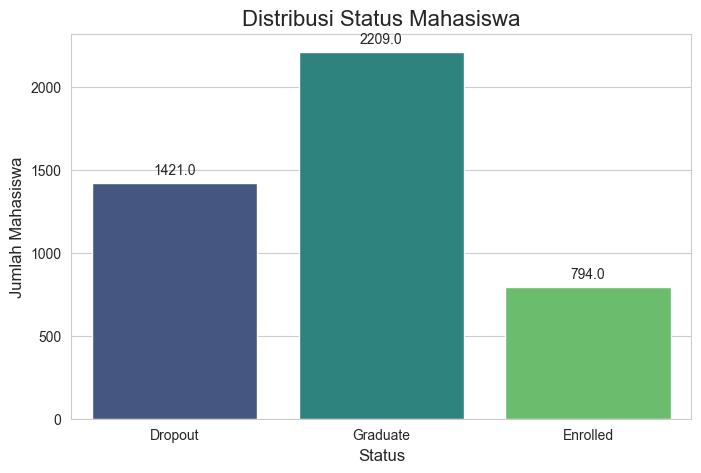

In [7]:
# Visualisasi distribusi status mahasiswa
plt.figure(figsize=(8, 5))

# Membuat count plot untuk melihat distribusi variabel 'Status'
ax = sns.countplot(x='Status', data=df, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Status Mahasiswa', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

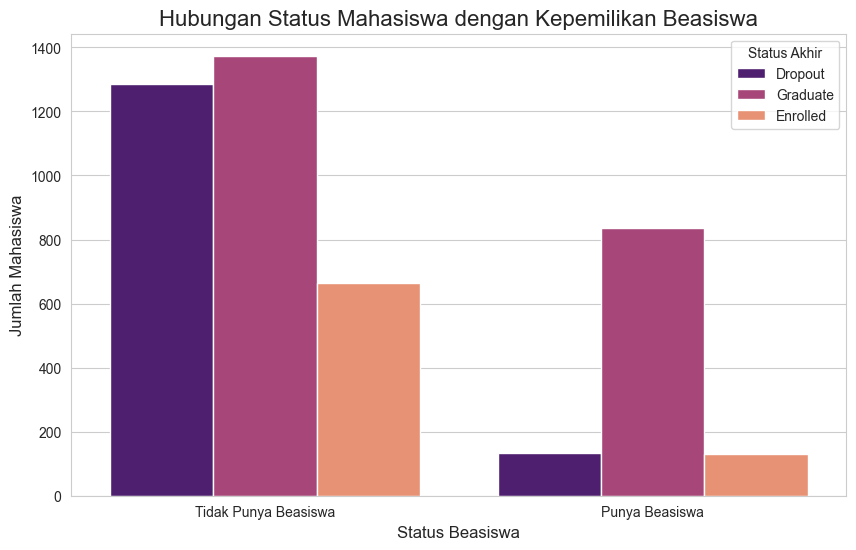

In [8]:
# Visualisasi hubungan status mahasiswa dengan beasiswa
plt.figure(figsize=(10, 6))

# Membuat count plot dengan 'Scholarship_holder' di sumbu x dan diwarnai berdasarkan 'Status'
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette='magma')

# Mengubah label sumbu x agar lebih deskriptif
plt.xticks(ticks=[0, 1], labels=['Tidak Punya Beasiswa', 'Punya Beasiswa'])

plt.title('Hubungan Status Mahasiswa dengan Kepemilikan Beasiswa', fontsize=16)
plt.xlabel('Status Beasiswa', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.legend(title='Status Akhir')
plt.show()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_23436\3349946809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='coolwarm')


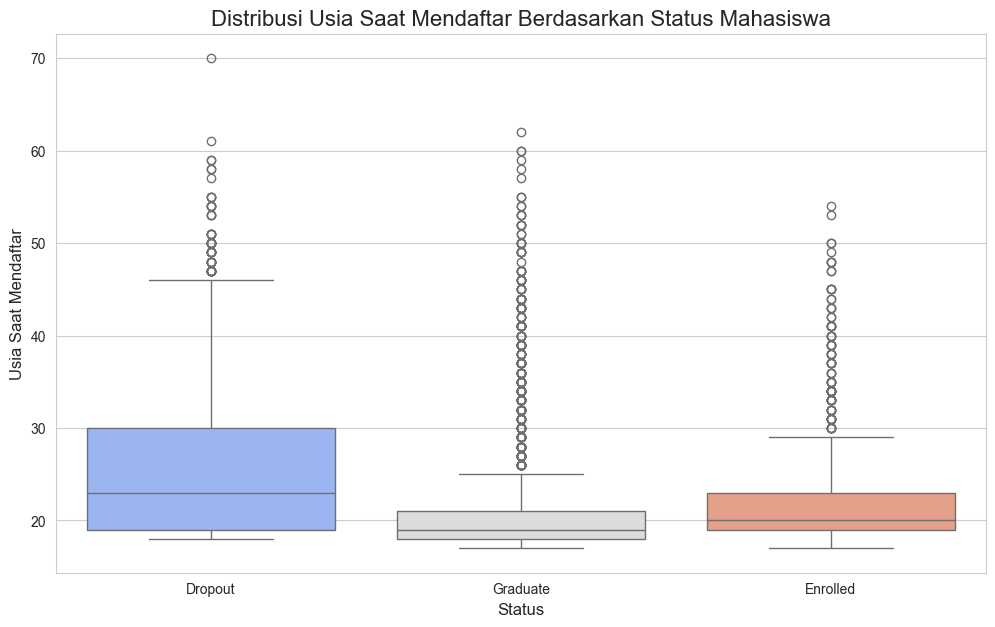

In [9]:
# Visualisasi distribusi usia berdasarkan status
plt.figure(figsize=(12, 7))

# Membuat box plot untuk melihat distribusi 'Age_at_enrollment' untuk setiap 'Status'
sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='coolwarm')

plt.title('Distribusi Usia Saat Mendaftar Berdasarkan Status Mahasiswa', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Usia Saat Mendaftar', fontsize=12)
plt.show()

## Data Preparation / Preprocessing

In [10]:
# Memisahkan fitur (X) dan target (y)
# X berisi semua kolom kecuali 'Status'
X = df.drop('Status', axis=1)

# y hanya berisi kolom 'Status'
y = df['Status']

# Menampilkan 5 baris pertama dari fitur dan target untuk verifikasi
print("Fitur (X) 5 baris pertama:")
display(X.head())

print("\nTarget (y) 5 baris pertama:")
display(y.head())

Fitur (X) 5 baris pertama:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79



Target (y) 5 baris pertama:


0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Status, dtype: object

In [11]:
# Encoding variabel target
# Membuat instance dari LabelEncoder
le = LabelEncoder()

# Melakukan encoding pada variabel target y
y_encoded = le.fit_transform(y)

# Menampilkan hasil encoding untuk beberapa nilai pertama
print("Label Asli:", y.unique())
print("Hasil Encoding:", np.unique(y_encoded))
print("Mapping (Urutan bisa berbeda):")
for i, label in enumerate(le.classes_):
    print(f"- {label}: {i}")

# Kita akan menggunakan y_encoded untuk langkah selanjutnya
y = y_encoded

Label Asli: ['Dropout' 'Graduate' 'Enrolled']
Hasil Encoding: [0 1 2]
Mapping (Urutan bisa berbeda):
- Dropout: 0
- Enrolled: 1
- Graduate: 2


In [12]:
# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Fitur berhasil di-scale!")
print(f"Ukuran data setelah scaling: {X_scaled.shape}")

Fitur berhasil di-scale!
Ukuran data setelah scaling: (4424, 36)


In [13]:
# Membagi data menjadi 80% data latih dan 20% data uji
# stratify=y memastikan proporsi setiap kelas di target sama di data latih dan uji
# random_state=42 memastikan hasil pembagian data selalu sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan ukuran dari masing-masing set data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (3539, 36)
Ukuran X_test: (885, 36)
Ukuran y_train: (3539,)
Ukuran y_test: (885,)


## Modeling

In [14]:
# Membuat dan melatih model Random Forest
# n_estimators adalah jumlah "pohon" dalam "hutan"
# random_state=42 untuk hasil yang konsisten
print("Melatih model Random Forest...")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

model_rf.fit(X_train_scaled, y_train)
print("Model Random Forest berhasil dilatih!")

Melatih model Random Forest...
Model Random Forest berhasil dilatih!


In [15]:
# Membuat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)
print("Prediksi berhasil dibuat!")

Prediksi berhasil dibuat!


## Evaluation

In [16]:
# Mengevaluasi performa model Random Forest
print("--- Hasil Evaluasi Model Random Forest ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Model: {accuracy_rf:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

--- Hasil Evaluasi Model Random Forest ---
Akurasi Model: 0.7695

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.38      0.45       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



Confusion Matrix:


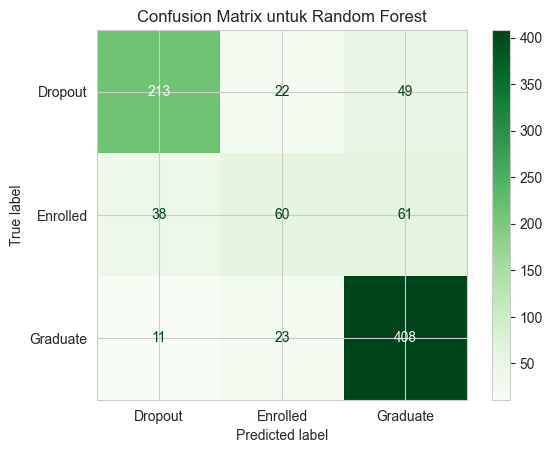

In [17]:
# Menampilkan Confusion Matrix untuk Random Forest
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap='Greens')
plt.title('Confusion Matrix untuk Random Forest')
plt.show()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_23436\2007932800.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_features, y=top_15_features.index, palette='plasma')


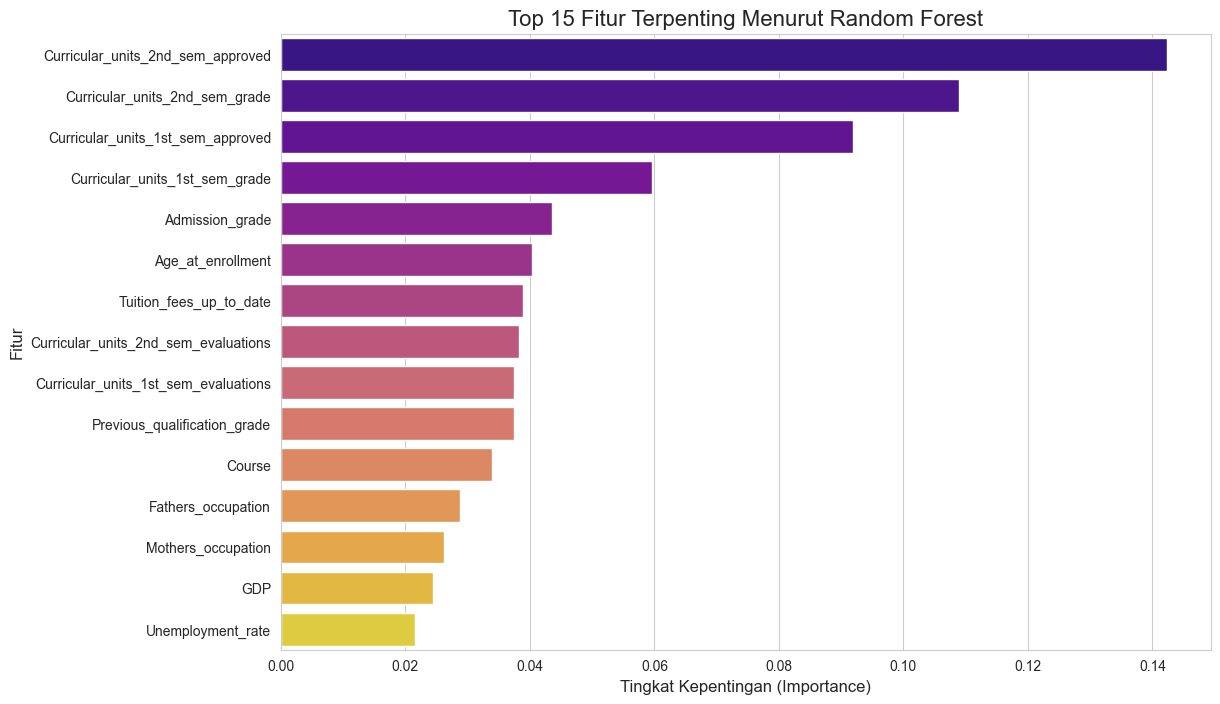

In [18]:
# Analisis Feature Importance
# Membuat series pandas untuk feature importances
importances = pd.Series(model_rf.feature_importances_, index=X.columns)

# Mengurutkan fitur dari yang paling penting
top_15_features = importances.sort_values(ascending=False).head(15)

# Membuat plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_features, y=top_15_features.index, palette='plasma')
plt.title('Top 15 Fitur Terpenting Menurut Random Forest', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

In [19]:
# Menyimpan model dan preprocessor
os.makedirs('model', exist_ok=True)

# Menyimpan model Random Forest
joblib.dump(model_rf, 'model/model_rf.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'model/scaler.pkl')

# Menyimpan label encoder
joblib.dump(le, 'model/label_encoder.pkl')

print("Model, scaler, dan label encoder berhasil disimpan di dalam folder 'model/.")

Model, scaler, dan label encoder berhasil disimpan di dalam folder 'model/.
